Import libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for regression and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load the dataset

In [5]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Immersion\Section 6\lending_club_loans_cleaned.csv', low_memory=False)

Clean the data

In [8]:
# Remove missing values from the target variable (int_rate)
df = df.dropna(subset=['int_rate'])

Visual exploration

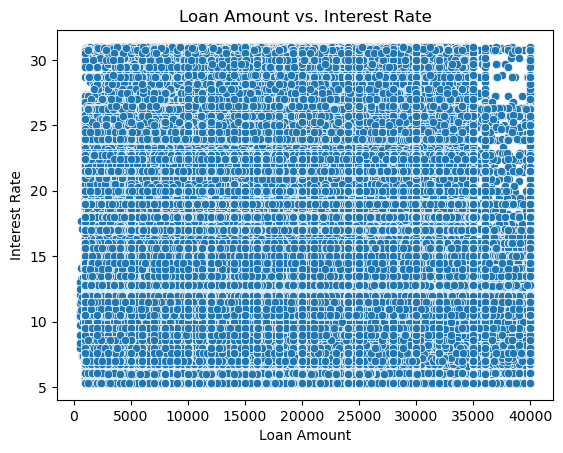

In [11]:
sns.scatterplot(x='loan_amnt', y='int_rate', data=df)
plt.title('Loan Amount vs. Interest Rate')    
plt.xlabel('Loan Amount')                     
plt.ylabel('Interest Rate')                   
plt.show() 

Hypothesis

Hypothesis: Higher loan amounts lead to higher interest rates.

In [15]:
# Reshape the variables into NumPy arrays
X = df['loan_amnt'].values.reshape(-1, 1)
y = df['int_rate'].values.reshape(-1, 1)

Split data into training and test sets

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear regression

In [21]:
# Fit the model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict interest rates for test set
y_pred = model.predict(X_test)

Visualize the regression line on top of the actual test data

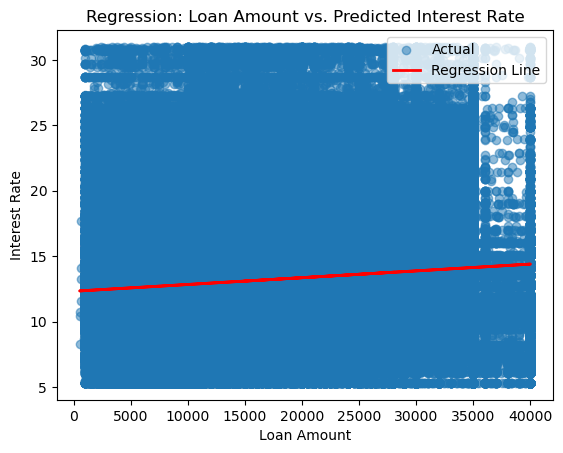

In [28]:
# Plot regression to the test set
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression: Loan Amount vs. Predicted Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(loc='upper right')  
plt.show()

Interpretation of Regression Line Fit:

The regression line plotted over the test set reveals a general upward trend between loan amount and interest rate, indicating a positive linear relationship. However, the data points are fairly widely dispersed around the regression line, suggesting that the model does not capture all the variability in the data.

While the line does follow the overall direction of the data, the spread and number of points far from the line indicate that loan amount alone is not a strong predictor of interest rate. This suggests that additional factors such as credit history, income, or loan term—might be influencing interest rates and should be considered in a more complex model (e.g., multiple regression).

Overall, the model captures the basic trend, but its predictive power is likely limited.

Model performance statistics: MSE and R2 score

In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23.04310997276416
R-squared: 0.009318203369172662


Mean Squared Error:

This value indicates the average squared difference between the predicted and actual interest rates. While MSE provides a measure of error magnitude, its interpretation depends on the scale of the target variable (int_rate). In this case, an MSE of ~23 suggests that the predictions are quite far off on average, which signals a weak model.

R-squared:

This value means the model explains less than 1% of the variance in interest rates. In other words, loan amount alone does not meaningfully predict interest rate. A good model typically has an R² closer to 1 (or at least >0.5 in basic models), so this is a very poor fit.

Compare predicted y-values to actual y-values: 

In [47]:
comparison_df = pd.DataFrame({
    'Actual Interest Rate': y_test.flatten(),
    'Predicted Interest Rate': y_pred.flatten()
})
print(comparison_df.head())

   Actual Interest Rate  Predicted Interest Rate
0                  6.62                13.769267
1                 25.11                12.868536
2                 10.91                13.250113
3                 17.99                12.522001
4                 16.02                12.564831


Interpretation:

- The predicted interest rates are tightly clustered around ~13%, while the actual interest rates show significant variation (ranging from ~6.6% to 25% just in the first few rows).

- This suggests that the model is not sensitive to the actual variation in interest rates. It's predicting roughly the same value for all inputs, which is typical when a model fits a horizontal or near-horizontal regression line.

- This confirms the low R² value observed earlier: the model does not capture the real relationship (if any) between loan amount and interest rate.

Model Performance Evaluation
The model performed poorly on the test set, as indicated by the following metrics:

- R-squared (R²): 0.009 — This means the model explains less than 1% of the variance in interest rates. In practical terms, the model has almost no predictive power when using loan amount as the sole predictor.

- Mean Squared Error (MSE): 23.04 — This is relatively high given that interest rates generally fall within the 5–30% range, suggesting large deviations between predicted and actual values.

- Additionally, the predicted values were clustered tightly around ~13%, while the actual values varied widely, confirming the model's inability to account for the real distribution of the target variable.

Reflections on Possible Data Bias
Several factors may have contributed to the model's poor performance:

- Omitted Variable Bias: Interest rates are likely influenced by multiple features (e.g., credit grade, term, debt-to-income ratio), not just loan amount. By using a single predictor, we excluded other variables that could have improved the model.

- Data Distribution Imbalance: If most loans fall within a narrow band of amounts or if certain interest rate values are overrepresented, the model might lean toward predicting a central tendency rather than reflecting actual variance.

- Non-linearity: The relationship between loan amount and interest rate may not be linear. A linear regression model may not be suitable if the underlying relationship is curved or tiered (e.g., based on credit risk tiers).

- Noise in Data: Lending Club loans can be influenced by factors not included in the dataset, such as the borrower's credit history outside the dataset or lending policies, which may inject noise the model cannot capture.

In summary, the poor model performance suggests that loan amount alone is a weak predictor of interest rates and that a more complex or multidimensional model is needed to capture the real dynamics at play.